In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data

For this project, I am using the [CMU Book Summary Dataset](https://www.cs.cmu.edu/~dbamman/booksummaries.html). It consists of metadata and summaries for 16,559 books from Wikipedia.

In [3]:
colnames = ['Wikipedia ID', 'Freebase ID', 'Title', 'Author', 'Publication Date','Genres','Plot Summary']
df = pd.read_csv('data/booksummaries.txt',sep='\t',header=None, names=colnames)
df.head()

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Plot Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


---

Clean the data to remove JSON formatting in the generes column, and then select our columns of interest for our model.

In [6]:
data_json = df['Genres'].apply(lambda x: json.loads(x) if isinstance(x, str) and x.strip() != '' else None)

df['Genres'] = data_json.apply(lambda x: list(x.values()) if x else [])

In [7]:
df.head()

,Wikipedia ID,Freebase ID,Title,Author,Publication Date,Genres,Plot Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,[],The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...


In [37]:
data = df[['Wikipedia ID','Title','Author','Publication Date','Genres','Plot Summary']]
data.head()

,Wikipedia ID,Title,Author,Publication Date,Genres,Plot Summary
0,620,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,986,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,[],The argument of the Enquiry proceeds by a ser...
4,2080,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...


Convert the strings to lower-case

In [39]:
data.loc[:,['Plot Summary', 'Title', 'Author']]=data[['Plot Summary', 'Title', 'Author']].apply(lambda x: x.str.lower())
data.loc[:,'Genres'] = data['Genres'].apply(lambda x: [item.lower() for item in x])

Covert the genre column to a single string for each book

In [41]:
data.loc[:,'Genres']=data['Genres'].apply(lambda x: ' '.join(x))
data.head()

,Wikipedia ID,Title,Author,Publication Date,Genres,Plot Summary
0,620,animal farm,george orwell,1945-08-17,roman à clef satire children's literature spec...,"old major, the old boar on the manor farm, ca..."
1,843,a clockwork orange,anthony burgess,1962,science fiction novella speculative fiction ut...,"alex, a teenager living in near-future englan..."
2,986,the plague,albert camus,1947,existentialism fiction absurdist fiction novel,the text of the plague is divided into five p...
3,1756,an enquiry concerning human understanding,david hume,NaN,,the argument of the enquiry proceeds by a ser...
4,2080,a fire upon the deep,vernor vinge,NaN,hard science fiction science fiction speculati...,the novel posits that space around the milky ...


---

## Exploratory Data Analysis

In [13]:
# summary of data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Wikipedia ID      16559 non-null  int64 
 1   Title             16559 non-null  object
 2   Author            14177 non-null  object
 3   Publication Date  10949 non-null  object
 4   Genres            16559 non-null  object
 5   Plot Summary      16559 non-null  object
dtypes: int64(1), object(5)
memory usage: 776.3+ KB


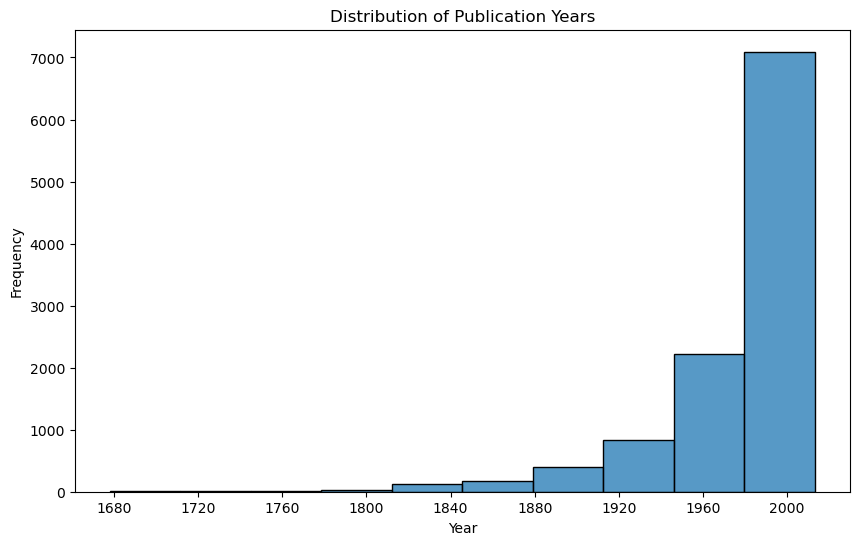

In [14]:
# distribution of years
years = pd.to_datetime(data['Publication Date'],format='mixed',errors='coerce')

sns.color_palette("deep")
plt.figure(figsize=(10, 6))
sns.histplot(years, bins=10)
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

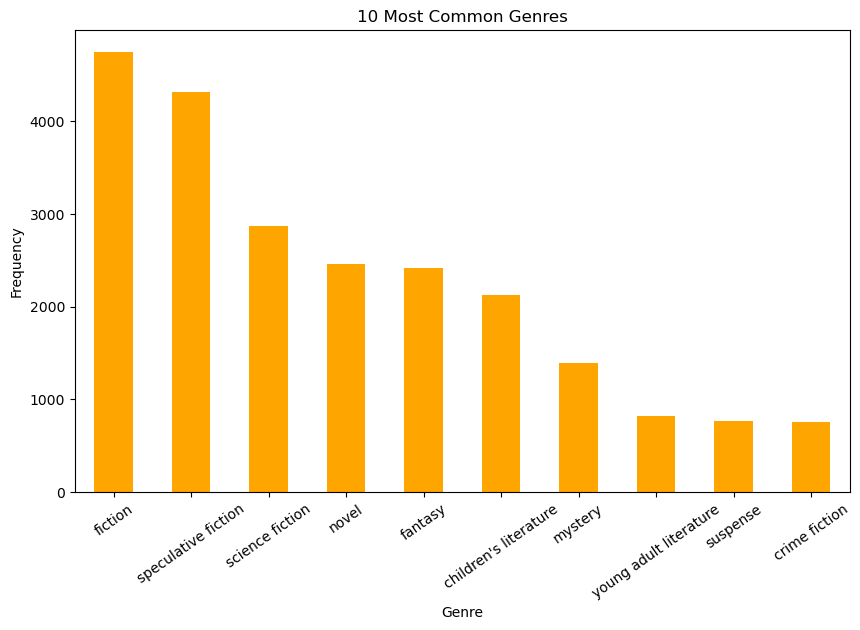

In [15]:
# 10 most common genres
genres_list = [genre for sublist in data['Genres'] for genre in sublist]
genre_count = pd.Series(genres_list).value_counts()

plt.figure(figsize=(10, 6))
genre_count.head(10).plot(kind='bar', color = 'orange')
plt.title('10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=35)
plt.show()

## Save the modified dataset

In [17]:
data.to_pickle("data/modified_data")